In [126]:
#from urllib.request import urlopen
import spacy
from spacy.cli import link
from spacy.util import get_package_path
from gensim.models import LsiModel

model_name = "de_core_news_sm"
package_path = get_package_path(model_name)
link(model_name, model_name, force=True, model_path=package_path)
nlp = spacy.load("de_core_news_sm")

import operator
import numpy as np
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim import corpora, models
from pprint import pprint
import char_split
import pyLDAvis.gensim

✔ Linking successful
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\de_core_news_sm
-->
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\spacy\data\de_core_news_sm
You can now load the model via spacy.load('de_core_news_sm')


In [263]:
newdf= pd.read_csv(r"C:\Users\Thomas.Zoellinger\Documents\Jupyter Notebooks\Test.csv",sep="@",encoding="UTF-16")
newdf.drop_duplicates()

,Unnamed: 0,Headline,Hauptartikel,Link,date,Location,Location2,Beschreibung
0,0,Unfall zwischen Auto und Straßenbahn,Heute Morgen stießen auf der Mainzer Landstra...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Griesheim,NaN,Frankfurt (ots) (ka)
1,1,Geschwindigkeitsmessungen,Auch in der kommenden Woche werden im Frankfu...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Stadtgebiet,NaN,Frankfurt (ots) (fue)
2,2,Wohnungsbrand,Die 68-jährige Mieterin einer Wohnung in der ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Oberrad,NaN,Frankfurt (ots) (fue)
3,3,Zeugensuche,"Am Mittwoch, den 17. April 2019, gegen 22.10 ...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Bundesautobahn,NaN,Frankfurt (ots) (fue)
4,4,Festnahme eines Jugendlichen,Gestern (16.04.2019) hat ein 14-Jähriger glei...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-17,Innenstadt,NaN,Frankfurt (ots) (em)
5,5,Lastwagen umgekippt,Gestern Nachmittag fiel ein Lastwagen auf der...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-17,Bundesautobahn,NaN,Frankfurt (ots) (ka)
6,6,Frau an Straßenbahnhaltestelle verletzt,Eine 77-jährige Frankfurterin befand sich am ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-17,Bornheim,NaN,Frankfurt (ots) (fue)
7,7,Zeugensuche!,Nach dem bisherigen Ermittlungsstand gerieten...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-17,Nordend,NaN,Frankfurt (ots) (fue)
8,8,Schwerer Verkehrsunfall,"Heute, am 16. April 2019, gegen 12.05 Uhr, wu...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-16,Bundesautobahn,NaN,Frankfurt (ots) (fue)
9,9,Verkehrsunfall,Ein 61-jähriger Mann aus Nidderau befuhr am M...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-16,Innenstadt,NaN,Frankfurt (ots) (fue)


In [264]:
newdf["Clean_Hauptartikel"] = newdf['Hauptartikel'].str.replace('[^\w\s]','')

<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-264-45cd58dc3595>:1: DeprecationWarning: invalid escape sequence \w
  newdf["Clean_Hauptartikel"] = newdf['Hauptartikel'].str.replace('[^\w\s]','')


In [265]:
def getLemma(column):
    """return the Lemmas for a given column"""
    doc = nlp(text=column)
    CleanWordList=[]
    for token in doc:
        CleanWordList.append(token.lemma_)
    CleanWord = " ".join(CleanWordList)
    return CleanWord


In [266]:
stop = open(r"C:\Users\Thomas.Zoellinger\Downloads\Stopwords1.txt", "r")
stop.close()
stop = open(r"C:\Users\Thomas.Zoellinger\Downloads\Stopwords1.txt", "r")
stop = list(stop)
stop = list(map(lambda s: s.strip(),stop))

In [267]:
def getElement(Liste):
    return ' '.join(Liste)

In [268]:
newdf["Headline"].str.replace('\d+', '')

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-268-419943424850>:1: DeprecationWarning: invalid escape sequence \d
  newdf["Headline"].str.replace('\d+', '')


0                   Unfall zwischen Auto und Straßenbahn
1                              Geschwindigkeitsmessungen
2                                          Wohnungsbrand
3                                            Zeugensuche
4                           Festnahme eines Jugendlichen
5                                    Lastwagen umgekippt
6                Frau an Straßenbahnhaltestelle verletzt
7                                           Zeugensuche!
8                                Schwerer Verkehrsunfall
9                                         Verkehrsunfall
10                                      Pkw aufgebrochen
11               Geklauter Roller schnell wiedergefunden
12                  Drogendealer rennt bei Kontrolle weg
13        -jähriger Autofahrer flüchtet nicht ohne Grund
14                    Schreckschusswaffen sichergestellt
15                 Flüchtiger verursacht weiteren Unfall
16     Pressemeldung von Ordnungsamt und Feuerwehr de...
17                             

In [269]:
def getCleanColumn(Column):
    """Clean the whole column. Get lemmas, remove stopwords, white spaces, digits and transform to lower"""
    Column = Column.apply(getLemma)
    Column = pd.Series(Column)
    Column = Column.str.replace('[^\w\s]','')
    Column = Column.str.lower()
    Column = Column.apply(lambda x: [item for item in x.split() if item not in stop])
    Column = pd.Series(Column)
    Column = Column.apply(getElement)
    Column = Column.str.replace('\d+', '')
    Column = Column.apply(lambda x: [item for item in x.split() if item not in stop])
    Column = Column.apply(getElement)
    Column = pd.DataFrame(Column)
    return Column

<>:5: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \d
<ipython-input-269-d47efeeea282>:5: DeprecationWarning: invalid escape sequence \w
  Column = Column.str.replace('[^\w\s]','')
<ipython-input-269-d47efeeea282>:10: DeprecationWarning: invalid escape sequence \d
  Column = Column.str.replace('\d+', '')


In [270]:
Lemmas = newdf["Clean_Hauptartikel"].apply(getLemma)
Lemmas = pd.DataFrame(Lemmas)
Lemmas["Clean_Hauptartikel"]= Lemmas["Clean_Hauptartikel"].str.lower()
Lemmas["Clean_Hauptartikel"].head()

0      heute morgen stoßen auf der mainzer landstra...
1      auch in der kommend woche werden im frankfur...
2      der 68jährige mieterin einer wohnung in der ...
3      am mittwoch der 17 april 2019 gegen 2210 uhr...
4      gestern 16042019 haben einen 14jähriger glei...
Name: Clean_Hauptartikel, dtype: object

In [271]:
Lemmas = Lemmas["Clean_Hauptartikel"].apply(lambda x: [item for item in x.split() if item not in stop])
Lemmas = pd.DataFrame(Lemmas)
Lemmas.head()

,Clean_Hauptartikel
0,"[stoßen, audi, straßenbahn, bahnstrecke, voll,..."
1,"[kommend, geschwindigkeitsmessungen, durchführ..."
2,"[68jährige, mieterin, wohnung, offenbacher, 17..."
3,"[17, 2019, 2210, tanken, rastanlage, taunusbli..."
4,"[16042019, 14jähriger, jugendliche, innenstadt..."


In [272]:
Lemmas['liststring'] = [' '.join(map(str, l)) for l in Lemmas['Clean_Hauptartikel']]
Lemmas["liststring"] = Lemmas["liststring"].str.replace('\d+', '')
Lemmas['liststring'] = Lemmas['liststring'].apply(lambda x: [item for item in x.split() if item not in stop])
Lemmas.head()

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-272-be755fd31be7>:2: DeprecationWarning: invalid escape sequence \d
  Lemmas["liststring"] = Lemmas["liststring"].str.replace('\d+', '')


,Clean_Hauptartikel,liststring
0,"[stoßen, audi, straßenbahn, bahnstrecke, voll,...","[stoßen, audi, straßenbahn, bahnstrecke, voll,..."
1,"[kommend, geschwindigkeitsmessungen, durchführ...","[kommend, geschwindigkeitsmessungen, durchführ..."
2,"[68jährige, mieterin, wohnung, offenbacher, 17...","[mieterin, wohnung, offenbacher, herd, küche, ..."
3,"[17, 2019, 2210, tanken, rastanlage, taunusbli...","[tanken, rastanlage, taunusblick, verkehrsunfa..."
4,"[16042019, 14jähriger, jugendliche, innenstadt...","[jugendliche, innenstadt, bedrohen, erpresst, ..."


In [273]:
newdf["Clean_Hauptartikel"] = Lemmas['liststring']

In [274]:
def split_words(column):
    """Split German compund words into their most likely parts for a given column"""
    DataFrame = column.str.split(' ', expand=True).rename(columns=lambda x: f"string_{x+1}")
    for col in DataFrame.columns:
        column = DataFrame[col]
        column.fillna(value="", inplace= True)
        NewColumn = column.apply(char_split.split_compound)
        NewColumn = [item[0] for item in NewColumn]
        NewColumn = pd.DataFrame(NewColumn)
        NewColumn.columns = ["Confidence", "Word1","Word2"]
        Keep = NewColumn["Confidence"]<=0
        NewColumn[Keep] =" "
        NewColumn["Combine"] = NewColumn["Word1"]+" " + NewColumn["Word2"]
        #NewColumn["Combine"] = NewColumn["Combine"].str.lower()
        DataFrame[col]=NewColumn["Combine"]
    DataFrame['All_Combined'] = DataFrame.apply(' '.join, axis=1)
    DataFrame["All_Combined"]= getCleanColumn(DataFrame["All_Combined"])
    DataFrame["All_Combined"] = DataFrame["All_Combined"].str.lower()
    return DataFrame["All_Combined"]

In [275]:
newdf["CleanHeadline"]= getCleanColumn(newdf["Headline"])
newdf["sepHeadline"] = split_words(newdf['CleanHeadline'])
newdf["Clean_Hauptartikel"] =newdf["Clean_Hauptartikel"].apply(getElement)
newdf["allWords"]= newdf["sepHeadline"]+" "+ newdf["Clean_Hauptartikel"]+" " + newdf["CleanHeadline"]
newdf["allWords"] = newdf["allWords"].apply(lambda x: [item for item in x.split()])
dataset = (newdf["allWords"])
dataset_head = newdf["sepHeadline"]+" " +newdf["CleanHeadline"]
dataset_head= dataset_head.apply(lambda x: [item for item in x.split()])
newdf["sepHeadline"] = newdf["sepHeadline"].apply(lambda x: [item for item in x.split()])


newdf.head()

,Unnamed: 0,Headline,Hauptartikel,Link,date,Location,Location2,Beschreibung,Clean_Hauptartikel,CleanHeadline,sepHeadline,allWords
0,0,Unfall zwischen Auto und Straßenbahn,Heute Morgen stießen auf der Mainzer Landstra...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Griesheim,NaN,Frankfurt (ots) (ka),stoßen audi straßenbahn bahnstrecke voll sperr...,unfall auto straßenbahn,"[straße, bahnen]","[straße, bahnen, stoßen, audi, straßenbahn, ba..."
1,1,Geschwindigkeitsmessungen,Auch in der kommenden Woche werden im Frankfu...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Stadtgebiet,NaN,Frankfurt (ots) (fue),kommend geschwindigkeitsmessungen durchführen ...,geschwindigkeitsmessungen,"[geschwindigkeits, messung]","[geschwindigkeits, messung, kommend, geschwind..."
2,2,Wohnungsbrand,Die 68-jährige Mieterin einer Wohnung in der ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Oberrad,NaN,Frankfurt (ots) (fue),mieterin wohnung offenbacher herd küche ölen t...,wohnungsbrand,"[wohnungs, brand]","[wohnungs, brand, mieterin, wohnung, offenbach..."
3,3,Zeugensuche,"Am Mittwoch, den 17. April 2019, gegen 22.10 ...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Bundesautobahn,NaN,Frankfurt (ots) (fue),tanken rastanlage taunusblick verkehrsunfall l...,zeugensuche,[],"[tanken, rastanlage, taunusblick, verkehrsunfa..."
4,4,Festnahme eines Jugendlichen,Gestern (16.04.2019) hat ein 14-Jähriger glei...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-17,Innenstadt,NaN,Frankfurt (ots) (em),jugendliche innenstadt bedrohen erpresst barge...,festnahme jugendliche,[],"[jugendliche, innenstadt, bedrohen, erpresst, ..."


In [276]:

# be sure to split sentence before feed into Dictionary
#dataset = [d.split() for d in dataset]

vocab = gensim.corpora.Dictionary(dataset)
vocab_heads = gensim.corpora.Dictionary(dataset_head)

bow_corpus = [vocab.doc2bow(doc) for doc in dataset]
bow_corpus_heads = [vocab.doc2bow(doc) for doc in dataset_head]

tfidf = models.TfidfModel(bow_corpus)
tfidf_head = models.TfidfModel(bow_corpus_heads)

corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf_head = tfidf[bow_corpus_heads]


data = newdf["allWords"].apply(getElement)

In [278]:
#Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=vocab, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(7):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"täter" + 0.001*"handy" + 0.001*"opfern" + 0.001*"wohnung" + 0.001*"vw" + 0.001*"jugendliche" + 0.001*"verletzen" + 0.001*"flucht" + 0.001*"richtung" + 0.001*"cm"
Topic: 1 Word: 0.003*"gramm" + 0.002*"droge" + 0.002*"täter" + 0.002*"marihuana" + 0.002*"festnehmen" + 0.001*"wohnung" + 0.001*"kontrolle" + 0.001*"fahrrad" + 0.001*"haschisch" + 0.001*"bargeld"
Topic: 2 Word: 0.002*"unfall" + 0.001*"fahrzeug" + 0.001*"auto" + 0.001*"mercedes" + 0.001*"verkehrsunfall" + 0.001*"fahrer" + 0.001*"bmw" + 0.001*"pkw" + 0.001*"verletzen" + 0.001*"schwer"
Topic: 3 Word: 0.001*"brand" + 0.001*"wohnung" + 0.001*"auto" + 0.001*"feuern" + 0.001*"waffe" + 0.001*"kiosk" + 0.001*"fest" + 0.001*"gramm" + 0.001*"feuerwehr" + 0.001*"tiefgarage"
Topic: 4 Word: 0.001*"täter" + 0.001*"droge" + 0.001*"unbekannte" + 0.001*"handtasche" + 0.001*"schlagen" + 0.001*"rauben" + 0.001*"straße" + 0.001*"zeugin" + 0.001*"streifenwagen" + 0.001*"gesicht"
Topic: 5 Word: 0.002*"brand" + 0.002*"täter" + 0

In [279]:
def getTopics(lda_model_tfidf,bow_corpus):
    TopicList=[]
    for i in range(0, len(lda_model_tfidf.get_document_topics(bow_corpus))):
        TopicList.append(max(lda_model_tfidf.get_document_topics(bow_corpus[i]), key = lambda x : x[1]))
    return TopicList
TopicList = getTopics(lda_model_tfidf,bow_corpus)

In [280]:
TopicList = pd.DataFrame(TopicList)
newdf["TopicNumber"]= TopicList.iloc[:,0]
newdf["TopicProb"]= TopicList.iloc[:,1]
newdf.head()

,Unnamed: 0,Headline,Hauptartikel,Link,date,Location,Location2,Beschreibung,Clean_Hauptartikel,CleanHeadline,sepHeadline,allWords,TopicNumber,TopicProb
0,0,Unfall zwischen Auto und Straßenbahn,Heute Morgen stießen auf der Mainzer Landstra...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Griesheim,NaN,Frankfurt (ots) (ka),stoßen audi straßenbahn bahnstrecke voll sperr...,unfall auto straßenbahn,"[straße, bahnen]","[straße, bahnen, stoßen, audi, straßenbahn, ba...",5,0.648003
1,1,Geschwindigkeitsmessungen,Auch in der kommenden Woche werden im Frankfu...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Stadtgebiet,NaN,Frankfurt (ots) (fue),kommend geschwindigkeitsmessungen durchführen ...,geschwindigkeitsmessungen,"[geschwindigkeits, messung]","[geschwindigkeits, messung, kommend, geschwind...",6,0.980944
2,2,Wohnungsbrand,Die 68-jährige Mieterin einer Wohnung in der ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Oberrad,NaN,Frankfurt (ots) (fue),mieterin wohnung offenbacher herd küche ölen t...,wohnungsbrand,"[wohnungs, brand]","[wohnungs, brand, mieterin, wohnung, offenbach...",2,0.973927
3,3,Zeugensuche,"Am Mittwoch, den 17. April 2019, gegen 22.10 ...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Bundesautobahn,NaN,Frankfurt (ots) (fue),tanken rastanlage taunusblick verkehrsunfall l...,zeugensuche,[],"[tanken, rastanlage, taunusblick, verkehrsunfa...",5,0.989830
4,4,Festnahme eines Jugendlichen,Gestern (16.04.2019) hat ein 14-Jähriger glei...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-17,Innenstadt,NaN,Frankfurt (ots) (em),jugendliche innenstadt bedrohen erpresst barge...,festnahme jugendliche,[],"[jugendliche, innenstadt, bedrohen, erpresst, ...",0,0.648196


In [103]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [104]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [105]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [106]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [107]:
#start,stop,step=2,12,1
#plot_graph(newdf["allWords"],start,stop,step)

In [281]:
def getMyTopic(row, Model):
    bow = vocab.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[0]

def getMyTopic1(row, Model):
    bow = vocab.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[1]


In [182]:
newdf.head()

,Unnamed: 0,Headline,Hauptartikel,Link,date,Location,Location2,Beschreibung,Clean_Hauptartikel,CleanHeadline,sepHeadline,allWords,TopicNumber,TopicProb,Topic,Prob
0,0,Unfall zwischen Auto und Straßenbahn,Heute Morgen stießen auf der Mainzer Landstra...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Griesheim,NaN,Frankfurt (ots) (ka),stoßen audi straßenbahn bahnstrecke voll sperr...,unfall auto straßenbahn,"[straße, bahnen]","[straße, bahnen, stoßen, audi, straßenbahn, ba...",0,0.983878,0,1.461939
1,1,Geschwindigkeitsmessungen,Auch in der kommenden Woche werden im Frankfu...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Stadtgebiet,NaN,Frankfurt (ots) (fue),kommend geschwindigkeitsmessungen durchführen ...,geschwindigkeitsmessungen,"[geschwindigkeits, messung]","[geschwindigkeits, messung, kommend, geschwind...",3,0.983160,0,14.435752
2,2,Wohnungsbrand,Die 68-jährige Mieterin einer Wohnung in der ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Oberrad,NaN,Frankfurt (ots) (fue),mieterin wohnung offenbacher herd küche ölen t...,wohnungsbrand,"[wohnungs, brand]","[wohnungs, brand, mieterin, wohnung, offenbach...",2,0.976148,3,1.413978
3,3,Zeugensuche,"Am Mittwoch, den 17. April 2019, gegen 22.10 ...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Bundesautobahn,NaN,Frankfurt (ots) (fue),tanken rastanlage taunusblick verkehrsunfall l...,zeugensuche,[],"[tanken, rastanlage, taunusblick, verkehrsunfa...",0,0.990765,0,1.613891
4,4,Festnahme eines Jugendlichen,Gestern (16.04.2019) hat ein 14-Jähriger glei...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-17,Innenstadt,NaN,Frankfurt (ots) (em),jugendliche innenstadt bedrohen erpresst barge...,festnahme jugendliche,[],"[jugendliche, innenstadt, bedrohen, erpresst, ...",0,0.991092,2,2.620399


In [113]:
#Safe as Excel
newdf.to_excel(r"C:\Users\Thomas.Zoellinger\Downloads\MYDF.xlsx")

In [283]:
ldamodel = LdaModel(corpus=bow_corpus, num_topics=7, id2word=vocab)
hdpmodel = HdpModel(corpus=bow_corpus, id2word=vocab)
lsimodel = LsiModel(corpus=corpus_tfidf, num_topics=7, id2word=vocab)
lsimodelUpdate = models.LsiModel(corpus_tfidf, id2word=vocab, num_topics=7)
lsimodelUpdate.add_documents(corpus_tfidf_head, decay=0.5)  # now LSI has been trained on tfidf_corpus + another_tfidf_corpus
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=vocab, passes=2, workers=4)


c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


In [284]:
#https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html
#One of the problem with LDA is that if we train it on a large number of topics, the topics get "lost" among the numbers.
#Let us see if we can dig out the best topics from the best LDA model we can produce. 
#The function below can be used to control the quality of the LDA model we produce.
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    top_topics = [(0, 0)]
    while top_topics[0][1] < 0.97:
        lm = LdaModel(corpus=bow_corpus, id2word=vocab)
        coherence_values = {}
        for n, topic in lm.show_topics(num_topics=-1, formatted=False):
            topic = [word for word, _ in topic]
            cm = CoherenceModel(topics=[topic], texts=newdf["allWords"], dictionary=vocab, window_size=10)
            coherence_values[n] = cm.get_coherence()
        top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    return lm, top_topics

In [285]:
#m, top_topics = ret_top_model()
#top_topics

In [286]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
lsitopics_update = [[word for word, prob in topic] for topicid, topic in lsimodelUpdate.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lda_lsi_topics = [[word for word, prob in lm.show_topic(topicid)] for topicid, c_v in top_topics]
lda_model_tfidf_topics = [[word for word, prob in topic] for topicid, topic in lda_model_tfidf.show_topics(formatted=False)]


lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=newdf["allWords"], dictionary=vocab, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=newdf["allWords"], dictionary=vocab, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=newdf["allWords"], dictionary=vocab, window_size=10).get_coherence()
#lda_lsi_coherence = CoherenceModel(topics=lda_lsi_topics[:10], texts=train_texts, dictionary=dictionary, window_size=10).get_coherence()
lsi_coherence_Update = CoherenceModel(topics=lsitopics_update[:10], texts=newdf["allWords"], dictionary=vocab, window_size=10).get_coherence()
lda_model_tfidf_coher = CoherenceModel(topics=lda_model_tfidf_topics, texts=newdf["allWords"], dictionary=vocab, window_size=10).get_coherence()

In [287]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

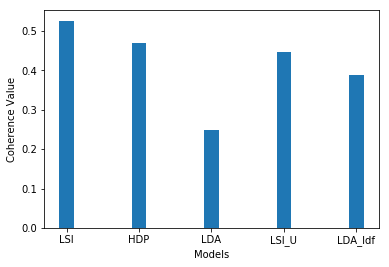

In [289]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence,lsi_coherence_Update,lda_model_tfidf_coher],
                   ['LSI', 'HDP', 'LDA', "LSI_U", "LDA_Idf"])

In [157]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, bow_corpus, vocab)

AttributeError: 'LsiModel' object has no attribute 'inference'

In [209]:
newdf["Topic_LSI_Update"] = newdf["allWords"].apply(getMyTopic, args=[lsimodelUpdate])
newdf["Prob_LSI_Update"] = newdf["allWords"].apply(getMyTopic1,args=[lsimodelUpdate])
newdf["Topic_LSI"] = newdf["allWords"].apply(getMyTopic, args=[lsimodel])
newdf["Prob_LSI"] = newdf["allWords"].apply(getMyTopic1,args=[lsimodel])

In [210]:
newdf[newdf['CleanHeadline'].str.contains("unfall")]

,Unnamed: 0,Headline,Hauptartikel,Link,date,Location,Location2,Beschreibung,Clean_Hauptartikel,CleanHeadline,sepHeadline,allWords,TopicNumber,TopicProb,Topic,Prob,Topic_LSI_Update,Prob_LSI_Update,Topic_LSI,Prob_LSI
0,0,Unfall zwischen Auto und Straßenbahn,Heute Morgen stießen auf der Mainzer Landstra...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Griesheim,NaN,Frankfurt (ots) (ka),stoßen audi straßenbahn bahnstrecke voll sperr...,unfall auto straßenbahn,"[straße, bahnen]","[straße, bahnen, stoßen, audi, straßenbahn, ba...",0,0.983878,0,1.461939,0,1.269334,1,2.223660
8,8,Schwerer Verkehrsunfall,"Heute, am 16. April 2019, gegen 12.05 Uhr, wu...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-16,Bundesautobahn,NaN,Frankfurt (ots) (fue),funkstreife polizeiautobahnstation pannenfahrz...,schwerer verkehrsunfall,"[verkehr, unfall]","[verkehr, unfall, funkstreife, polizeiautobahn...",0,0.911315,0,1.305202,0,1.500558,2,2.601076
9,9,Verkehrsunfall,Ein 61-jähriger Mann aus Nidderau befuhr am M...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-16,Innenstadt,NaN,Frankfurt (ots) (fue),nidderau befahren vw golfen heiligkreuzgasse h...,verkehrsunfall,"[verkehr, unfall]","[verkehr, unfall, nidderau, befahren, vw, golf...",2,0.889273,0,0.350926,0,2.035658,2,1.952798
15,15,Flüchtiger verursacht weiteren Unfall,Gestern (14.04.2019) verursachte ein 27-jähri...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-15,Bundesautobahn,NaN,Frankfurt (ots) (em),verursachen unfall zweite sorgen zweistündig k...,flüchtiger verursachen unfall,[ursache],"[ursache, verursachen, unfall, zweite, sorgen,...",2,0.933433,0,0.829177,0,1.879591,1,3.596071
23,23,Pressemitteilung des Polizeipräsidiums Südosth...,Nach einem schweren Verkehrsunfall am Donners...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-12,Maintal,NaN,Frankfurt (ots) (neu),schwer verkehrsunfall bundesstraße maintal prü...,pressemitteilung südosthessen unfall rennen vo...,"[presse, mitteilung, südost, hessen, ren, nen]","[presse, mitteilung, südost, hessen, ren, nen,...",3,0.972352,0,1.310678,0,1.290371,1,3.207422
34,34,Schwerer Verkehrsunfall mit einem Lkw und vier...,Heute Vormittag (10.04.2019) kam es auf der A...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-10,BAB,NaN,Frankfurt (ots) (em),fahrtrichtung würzburg schwer verkehrsunfall s...,schwerer verkehrsunfall lkw auto,"[verkehr, unfall]","[verkehr, unfall, fahrtrichtung, würzburg, sch...",2,0.880550,0,1.834691,0,2.911068,2,5.191391
39,39,-Jähriger baut Unfall und flüchtet - Zeugen ge...,In der Nacht von Sonntag auf Montag krachte e...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-09,Innenstadt,NaN,Frankfurt (ots) (ka),krachen alkoholisiert autofahrer verkehrsschil...,bauen unfall flüchten,[],"[krachen, alkoholisiert, autofahrer, verkehrss...",0,0.984227,0,0.890368,0,1.854410,1,2.267783
46,46,Motorradfahrer nach Unfall verletzt,Am Sonntag stürzte ein 54-jähriger Motorradfa...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-08,Altstadt,NaN,Frankfurt (ots) (ka),stürzen motorradfahrer unfall auto kurtschumac...,motorradfahrer unfall verletzen,"[motorrad, fahrer]","[motorrad, fahrer, stürzen, motorradfahrer, un...",3,0.571813,0,0.482242,0,1.860164,2,2.157292
49,49,"Nachmeldung zur Pressemitteilung Nr. ""Schwere...","Wie den Medien bereits bekannt ist, kam es ge...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-08,BAB,NaN,Frankfurt (ots) (em),medium anschlussstelle schwer verkehrsunfall b...,nachmeldung pressemitteilung nummer schwerer v...,"[meldung, presse, mitteilung, verkehr, unfall]","[meldung, presse, mitteilung, verkehr, unfall,...",2,0.606658,0,0.760686,0,1.484316,2,2.950676
51,51,Schwerer Verkehrsunfall,Heute Mittag (07.04.2019) kam es auf der A3 i...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-07,BAB,NaN,Frankfurt (ots) (em),mittag anschlussstelle schwer verkehrsunfall a...,schwerer verkehrsunfall,"[verkehr, unfall]","[verkeh

In [212]:
newdf[newdf['CleanHeadline'].str.contains("brand")]

,Unnamed: 0,Headline,Hauptartikel,Link,date,Location,Location2,Beschreibung,Clean_Hauptartikel,CleanHeadline,sepHeadline,allWords,TopicNumber,TopicProb,Topic,Prob,Topic_LSI_Update,Prob_LSI_Update,Topic_LSI,Prob_LSI
2,2,Wohnungsbrand,Die 68-jährige Mieterin einer Wohnung in der ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-18,Oberrad,NaN,Frankfurt (ots) (fue),mieterin wohnung offenbacher herd küche ölen t...,wohnungsbrand,"[wohnungs, brand]","[wohnungs, brand, mieterin, wohnung, offenbach...",2,0.976148,3,1.413978,6,1.615583,1,0.993485
83,83,Wohnungsbrand,"Am Sonntag, den 31. März 2019, gegen 08.55 Uh...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-04-01,Dornbusch,NaN,Frankfurt (ots) (fue),inckusstraße wohnungsbrand betroffen dritt obe...,wohnungsbrand,"[wohnungs, brand]","[wohnungs, brand, inckusstraße, wohnungsbrand,...",0,0.754687,3,0.647861,6,2.290992,1,0.888660
133,133,Lkw-Brand,Heute Morgen (20.03.2019) geriet ein Lkw auf ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-20,Bundesautobahn,NaN,Frankfurt (ots) (md),lkw autobahnkreuz anschlussstelle frankfurtsüd...,lkwbrand,"[lkw, brand]","[lkw, brand, lkw, autobahnkreuz, anschlussstel...",0,0.528858,0,2.032450,6,2.845951,1,1.915845
138,138,Küchenbrand in Einfamilienhaus,Mehrere 10.000 Euro Sachschaden entstanden ge...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-20,Seckbach,NaN,Frankfurt (ots) (ne),euro sachschaden entstehen küchenbrand hausen ...,küchenbrand einfamilienhaus,"[küche, brand, einfamilien, hausen]","[küche, brand, einfamilien, hausen, euro, sach...",3,0.982437,3,0.983108,6,1.988422,1,1.281009
152,152,Fahrzeugbrand,"Am Donnerstag, den 14. März 2019, gegen 17.50...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-15,Bundesautobahn,NaN,Frankfurt (ots) (fue),fahrer mercedes verkehrsteilnehmer verkehrstei...,fahrzeugbrand,"[fahrzeug, brand]","[fahrzeug, brand, fahrer, mercedes, verkehrste...",3,0.980785,0,0.523763,6,2.338599,1,1.933125
157,157,Festnahme nach Kfz.-Brand,"Am Mittwoch, den 13. März 2019, gegen 21.15 U...",https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-14,Unterliederbach,NaN,Frankfurt (ots) (fue),brennen langobardenweg abgestellt vwtransporte...,festnahme kfzbrand,"[kfz, brand]","[kfz, brand, brennen, langobardenweg, abgestel...",1,0.649551,3,0.721852,6,1.179071,1,1.061049
159,159,. Euro Sachschaden nach Brand in einem Café,In den frühen Morgenstunden des heutigen Tage...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-13,Ostend,NaN,Frankfurt (ots) (hol),heutig brand café ostend sachschaden euro ents...,euro sachschaden brand café,"[sach, schaden]","[sach, schaden, heutig, brand, café, ostend, s...",3,0.982347,3,1.252560,6,2.653812,1,1.325765
176,176,Fahrzeugbrand,Am Freitagnachmittag (08. März 2019) brannte ...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-10,Bundesautobahn,NaN,Frankfurt (ots) (mc),freitagnachmittag brennen pkw richtung darmsta...,fahrzeugbrand,"[fahrzeug, brand]","[fahrzeug, brand, freitagnachmittag, brennen, ...",2,0.813900,0,0.718825,6,2.043841,1,1.261580
180,180,Mülltonnenbrand,Heute Nacht brannten in der Nähe des Nordwestz...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-08,Heddernheim,NaN,Frankfurt (ots) (ne),brennen nähe nordwestzentrums mülltonnen sachs...,mülltonnenbrand,[],"[brennen, nähe, nordwestzentrums, mülltonnen, ...",2,0.960882,3,0.567835,6,1.691311,1,0.694794
188,188,Mülltonnenbrand,Heute Nacht haben mehrere Mülltonnen in der Id...,https://www.presseportal.de/blaulicht/pm/4970/...,2019-03-06,Gallus,NaN,Frankfurt (ots) (ne),mülltonnen idsteiner straße ackermannstraße fe...,mülltonnenbrand,[],"[mülltonnen, idsteiner, straße, ackermannstraß...",0,0.982961,3,1.098999,6,1.827805,1,1.522054


In [78]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
data = newdf["allWords"].apply(getElement)

In [80]:
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(data)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_topics=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 

<>:5: DeprecationWarning: invalid escape sequence \-
<>:5: DeprecationWarning: invalid escape sequence \-
<>:5: DeprecationWarning: invalid escape sequence \-
<ipython-input-80-9adc92ccb623>:5: DeprecationWarning: invalid escape sequence \-
  token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


(273, 10)
(273, 10)
(273, 10)


In [144]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(18, 6),
  (25, 1),
  (38, 2),
  (39, 8),
  (40, 9),
  (41, 2),
  (42, 3),
  (43, 1),
  (44, 1),
  (45, 3),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 3),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 3),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(13, 2),
  (18, 3),
  (22, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86,

In [147]:
Model1 =models.TfidfModel(corpus=bow_corpus, normalize=True)

In [ ]:
Model1.